In [2]:
#imports

import numpy as np
from keras.layers import *
from keras.models import *
from keras.optimizers import *
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.
c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\program files\python37\lib\site-packages\tensorflow\python\framework\dtype

data:  (1, 1200, 2)
x: start at 0 - shape: (1, 800, 2)
y: start at 7 - shape: (1, 800, 2)
xForecast: start at 800 - shape: (1, 393, 2)
trueForecast: start at 807 - shape: (1, 393, 2)


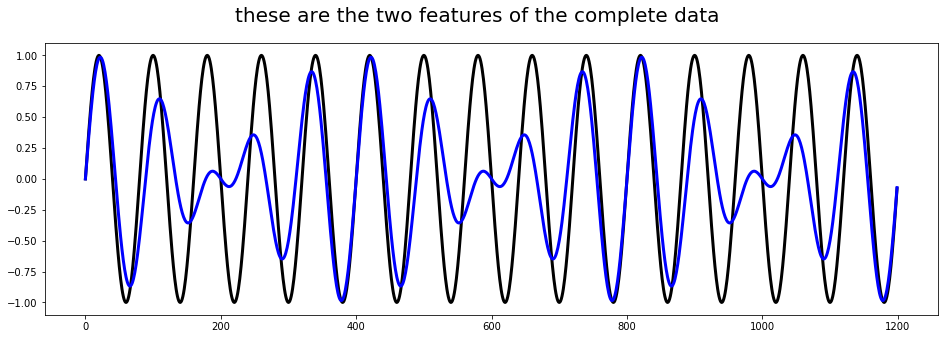

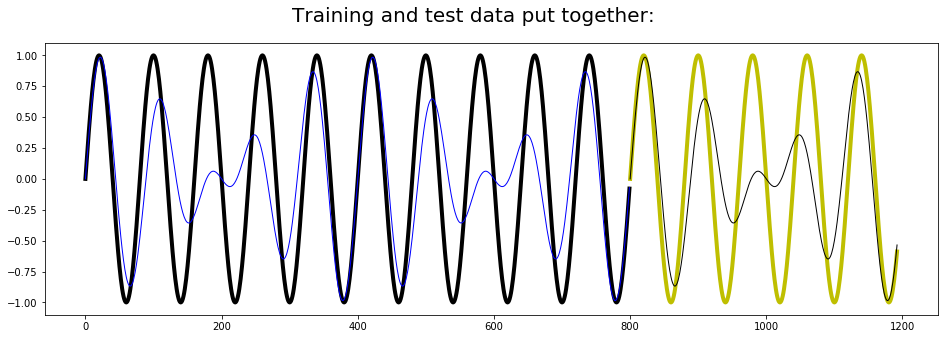

In [3]:
#creating and plotting the data

#creating some data - we will create a sinus and a sinus * sinus function
shift = 7
trainLength = 800
totalLength = 1200

data = np.empty((1,totalLength,2)) #0 to 1199

#x for the first sinus
base1 = np.array(range(totalLength))*(30*math.pi/totalLength) #30*pi means 15 complete oscilations
#the first sinus
data[0,:,0] = np.sin(base1)

#x for the second sinus - this reflects in a sinus with a different frequency
base2 = 0.8*base1


#the first * the second sinus 
data[0,:,1] = (np.sin(base1)+np.sin(base2))/2

print('data: ', data.shape)

def takeSlice(arr, fr, to, name):
    
    result = arr[:,fr:to,:]
    print(name + ": start at " + str(fr) + " - shape: " + str(result.shape))
    return result


#training data: y is one step ahead of x

x = takeSlice(data,0,trainLength,'x') #de 0 a 799
y = takeSlice(data,shift,shift+trainLength,'y') #de 7 a 806


#true data for forecasting:
xForecast = takeSlice(data,trainLength,-shift,'xForecast') #de 800 a 1192?
trueForecast = takeSlice(data,shift+trainLength,None,'trueForecast') #de 807 a 1199


#plotting

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(data[0,:,0],color='k',linewidth=3)
ax.plot(data[0,:,1],color='b',linewidth=3)
fig.suptitle('these are the two features of the complete data',fontsize=20)
plt.show()
print('\n\n\n\n')

#figure separating training and forecasting
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(range(trainLength),x[0,:,0],color='k',linewidth=4)
ax.plot(range(trainLength),x[0,:,1],color='b',linewidth=1)
ax.plot(range(trainLength,totalLength-shift),xForecast[0,:,0],color='y',linewidth=4)
ax.plot(range(trainLength,totalLength-shift),xForecast[0,:,1],color='k',linewidth=1)
fig.suptitle('Training and test data put together: ', fontsize=20)
plt.show()


In [70]:
#creating the model 
    
model = Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(None,2))) #input takes any steps, two features (var1 and var2)
model.add(LSTM(70,return_sequences=True))
model.add(LSTM(2,return_sequences=True)) #output keeps the steps and has two features
model.add(Lambda(lambda x: x*1.3))


In [71]:
#training the model

#this callback interrupts training when loss stops decreasing after 10 consecutive epochs. 
from keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='loss',min_delta=0.000000000001,patience=30) #this big patience is important

#different learning rates - train each indefinitely until the loss stops decreasing
#fount that the best rate is between 0.0001 and 0.00001
rates = [0.001,0.0001,0.00001]
for rate in rates:
    print('training with lr = ' + str(rate))
    model.compile(loss='mse', optimizer=Adam(lr=rate))
    model.fit(x,y,epochs=1000000,callbacks=[stop],verbose=2) #train indefinitely until loss stops decreasing
    print('\n\n\n\n\n')


training with lr = 0.001
Epoch 1/1000000
7s - loss: 0.3667
Epoch 2/1000000
1s - loss: 0.3419
Epoch 3/1000000
1s - loss: 0.3219
Epoch 4/1000000
1s - loss: 0.3030
Epoch 5/1000000
1s - loss: 0.2824
Epoch 6/1000000
1s - loss: 0.2587
Epoch 7/1000000
1s - loss: 0.2313
Epoch 8/1000000
1s - loss: 0.2005
Epoch 9/1000000
1s - loss: 0.1694
Epoch 10/1000000
1s - loss: 0.1437
Epoch 11/1000000
1s - loss: 0.1247
Epoch 12/1000000
1s - loss: 0.1054
Epoch 13/1000000
1s - loss: 0.0899
Epoch 14/1000000
1s - loss: 0.0888
Epoch 15/1000000
1s - loss: 0.0937
Epoch 16/1000000
1s - loss: 0.0903
Epoch 17/1000000
1s - loss: 0.0849
Epoch 18/1000000
1s - loss: 0.0849
Epoch 19/1000000
1s - loss: 0.0862
Epoch 20/1000000
1s - loss: 0.0825
Epoch 21/1000000
1s - loss: 0.0757
Epoch 22/1000000
1s - loss: 0.0708
Epoch 23/1000000
1s - loss: 0.0692
Epoch 24/1000000
1s - loss: 0.0672
Epoch 25/1000000
1s - loss: 0.0632
Epoch 26/1000000
2s - loss: 0.0596
Epoch 27/1000000
1s - loss: 0.0589
Epoch 28/1000000
1s - loss: 0.0599
Epoc

KeyboardInterrupt: 

In [72]:
#the model for predictions - copies the other model, but uses `return_sequences=False` and `stateful=True`
#the change is just to allow predicting step by step and using the predictions as new steps. 
newModel = Sequential()
newModel.add(LSTM(100,return_sequences=True,stateful=True,batch_input_shape=(1,None,2)))
newModel.add(LSTM(70,return_sequences=True,stateful=True))
newModel.add(LSTM(2,return_sequences=False,stateful=True))
newModel.add(Lambda(lambda x: x*1.3))

newModel.set_weights(model.get_weights())


#predicting from the predictions themselves (gets the training data as input to set states)
newModel.reset_states()

lastSteps = np.empty((1,totalLength-trainLength,2)) #includes a shift at the beginning to cover the gap 
lastSteps[:,:shift] = x[:,-shift:] #the initial shift steps are filled with x training data 
newModel.predict(x[:,:-shift,:]).reshape(1,1,2) #just to adjust states, predict with x without the last shift elements

rangeLen = totalLength-trainLength-shift
print('rangeLen: ', rangeLen)
for i in range(rangeLen):
    lastSteps[:,i+shift] = newModel.predict(lastSteps[:,i:i+1,:]).reshape(1,1,2)
print(lastSteps.shape)
forecastFromSelf = lastSteps[:,shift:,:]
print(forecastFromSelf.shape)


#predicting from test/future data:
newModel.reset_states()

newModel.predict(x) #just to set the states and get used to the sequence
newSteps = []
for i in range(xForecast.shape[1]):
    newSteps.append(newModel.predict(xForecast[:,i:i+1,:]))
forecastFromInput = np.asarray(newSteps).reshape(1,xForecast.shape[1],2)


rangeLen:  393
(1, 400, 2)
(1, 393, 2)


trueForecast:  (1, 393, 2)
forecastFromSelf:  (1, 393, 2)
forecastFromInput:  (1, 393, 2)



black line: true values
gold line: predicted values


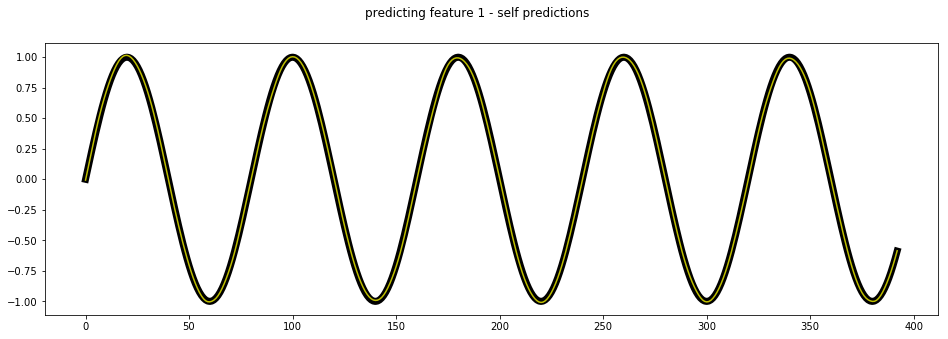

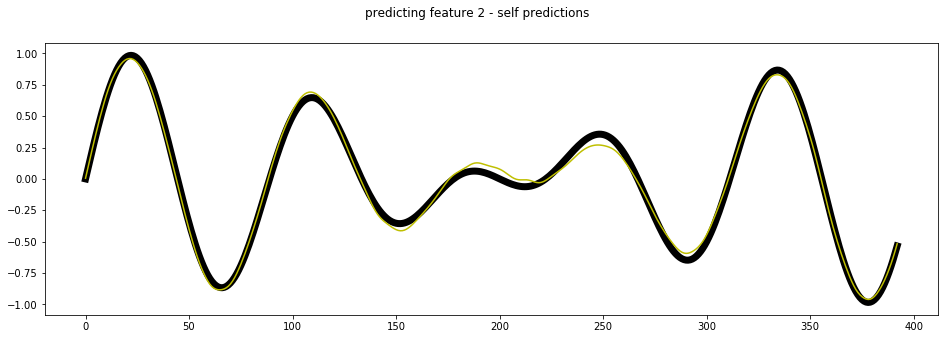

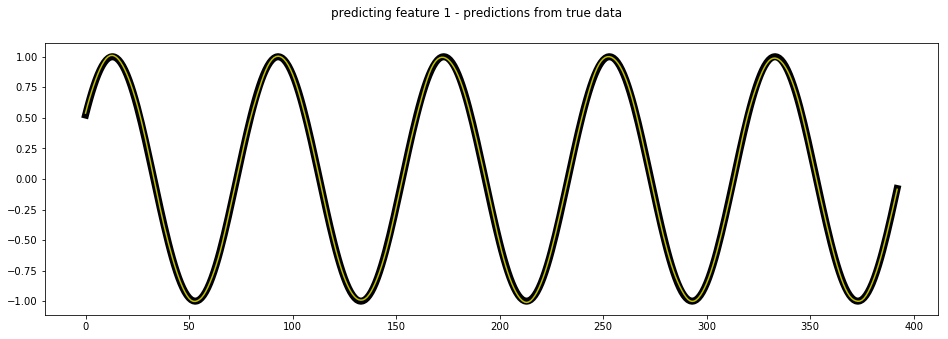

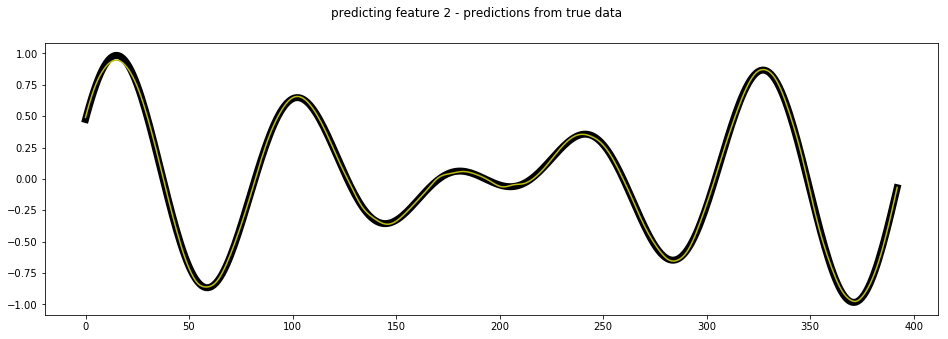

In [73]:
print('trueForecast: ', trueForecast.shape)
print('forecastFromSelf: ', forecastFromSelf.shape)
print('forecastFromInput: ', forecastFromInput.shape)
print('\n\n\nblack line: true values')
print('gold line: predicted values')


#self forecast
fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.plot(xForecast[0,:,0], linewidth=7,color='k') #this uses xForecast because it starts exactly where x ends
ax.plot(forecastFromSelf[0,:,0],color='y')
plt.suptitle("predicting feature 1 - self predictions")
plt.show()

fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.plot(xForecast[0,:,1],linewidth=7,color='k') #this uses xForecast because it starts exactly where x ends
ax.plot(forecastFromSelf[0,:,1],color='y')
plt.suptitle("predicting feature 2 - self predictions")
plt.show()


#forecast from test/future data:
fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.plot(trueForecast[0,:,0], linewidth=7,color='k')
ax.plot(forecastFromInput[0,:,0],color='y')
plt.suptitle("predicting feature 1 - predictions from true data")
plt.show()

fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.plot(trueForecast[0,:,1],linewidth=7,color='k')
ax.plot(forecastFromInput[0,:,1],color='y')
plt.suptitle("predicting feature 2 - predictions from true data")
plt.show()